# Grover's algorithm

In [1]:
from qiskit import *
import numpy as np
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.gate import *
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit import Gate
from qiskit.circuit.library import Diagonal

/home/jlucas/.local/lib/python3.6/site-packages/qiskit/__init__.py:66: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of qiskit-terra 0.17.0. Support for running Qiskit with Python 3.6 will be removed in qiskit-terra 0.20.0.
  DeprecationWarning,


## Useful gates

In [2]:
def grover_oracle(n, sol):
    diagonal_elements = [1]*(2**n)
    diagonal_elements[sol]= -1
    oracle = Diagonal(diagonal_elements)
    #print(diagonal_elements)
    oracle.name = "O$_{f}$"
    return oracle.to_gate()

In [3]:
def diffuser(n):
    qr = QuantumRegister(n)
    diffuser = QuantumCircuit(qr)
    
    diffuser.h(qr[:])
    diffuser.x(qr[:])
    diffuser.h(qr[-1])
    diffuser.mct(qr[:-1], qr[-1])  # multi-controlled-toffoli
    diffuser.h(qr[-1])
    diffuser.x(qr[:])
    diffuser.h(qr[:])
    return diffuser.to_gate(label='Diff')

## Useful functions

In [4]:
def simulate(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend = simulator).result()
    counts = result.get_counts(circuit)
    return counts

In [5]:
def grover_dec_bar(n,counts, m=0):
    t= 2**(n)
    x= range(t)
    y= [0]*t
    for num in list(counts.keys()) :
        no = int(num[m:], base = 2)
        #print(no)
        y[no]+= counts[num]
    y = np.array(y)/sum(y)

    plt.bar(x,y)

## Grover's coined version

We applie 

$U'=S \cdot C' = C_0\otimes (I-2\left|v\right\rangle \left\langle v \right|)$ 


to the initial state :

$\left|\psi _0\right\rangle = H^n\left|0\right\rangle^n  $

where :

$\left|v\right\rangle$ is the marked verticle

$C_0 = \begin{pmatrix}
\frac{2}{n}-1  & \frac{2}{n} & ... & \frac{2}{n} \\
\frac{2}{n}  & \frac{2}{n}-1 & ... & \frac{2}{n} \\
... & ... & ... & ... \\
\frac{2}{n}  & \frac{2}{n} & ... & \frac{2}{n}-1  
\end{pmatrix}$ is the grover's diffusion operator

$S=SWAP$ is the shift gate


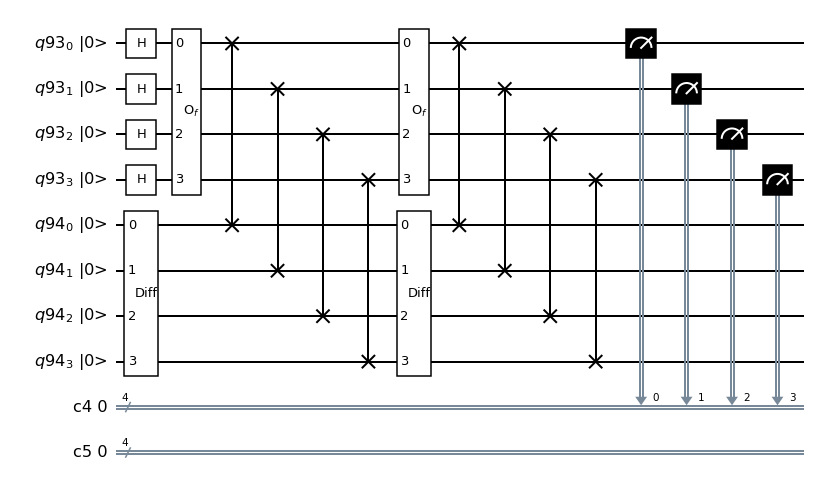

In [14]:
n=4
i = 3


qr = QuantumRegister(n)
qc = QuantumRegister(n)

cr = ClassicalRegister(n)
cc = ClassicalRegister(n)

circuit = QuantumCircuit(qr, qc , cr, cc)


circuit.h(qr[:])


oracle = grover_oracle(n, i)
circuit.append(oracle,  qr[:] )


diffuseur = diffuser(n)
circuit.append(diffuseur, qc[:])

circuit.swap(qc[:],qr[:])

circuit.append(oracle,  qr[:] )


circuit.append(diffuseur, qc[:])

circuit.swap(qc[:],qr[:])


circuit.measure(qr[:] , cr[:] )

circuit.draw(output ='mpl', style="bw", initial_state= True, filename ='grover_coin.png')

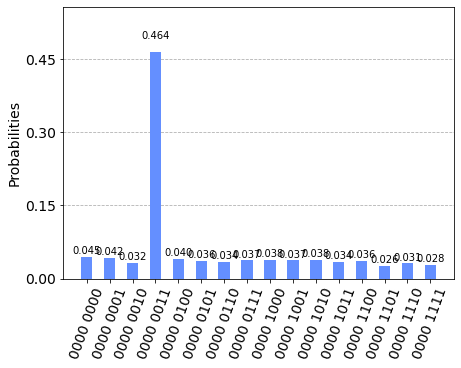

In [11]:
counts = simulate(circuit)
plot_histogram(counts)

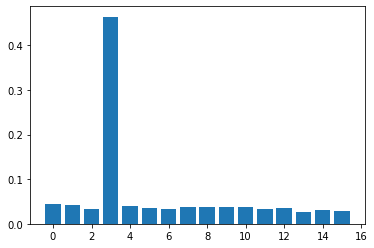

In [12]:
grover_dec_bar(n,counts,n+1)
#plt.savefig('output_grover.png')

## Grover's classical algorithm

This is the classical grover's algorithm

$U= D_{iffusion} \cdot O_{racle}$

applied to the initial state :



$\left|\psi _0\right\rangle = H^n\left|0\right\rangle^n  $


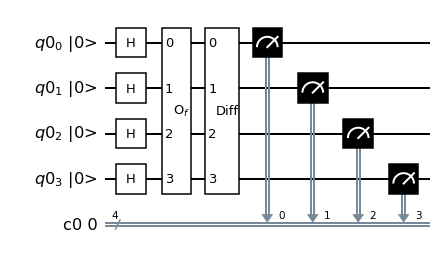

In [6]:
n=4
i = 4

qr = QuantumRegister(n)
cr = ClassicalRegister(n)


circuit = QuantumCircuit(qr , cr)

circuit.h(qr[:])

oracle = grover_oracle(n, i)
circuit.append(oracle,  qr[:] )

diffuseur = diffuser(n)
circuit.append(diffuseur, qr[:])

circuit.measure(qr, cr)

circuit.draw(output ='mpl', style="bw", filename ='Grover.png', initial_state= True)

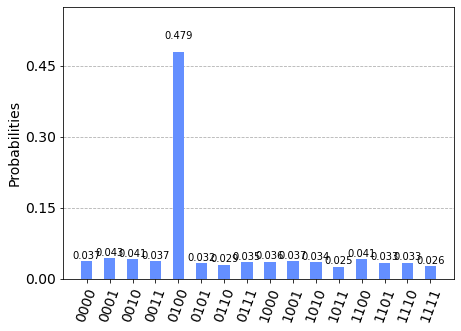

In [7]:
counts = simulate(circuit)
plot_histogram(counts)

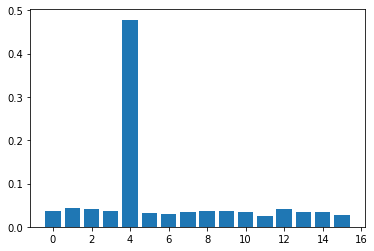

In [8]:
grover_dec_bar(n,counts)
#plt.savefig('output_grover.png')

## Conclusion : 

The two circuits are equivalent thanks to the $SWAP$ gate, the coined version has yet twice as much operations.